# UTSA CS 3793/5233: Assignment-4

**Rangarajan - Abhi - (uxs876)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [26]:
# import all required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [4]:

# Load the data - training as well as testing

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Prepare the data that can be used by the next step - creating and training the DL model

x_train = x_train.astype( 'float32' ) / 255.0
x_test = x_test.astype( 'float32' ) / 255.0

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


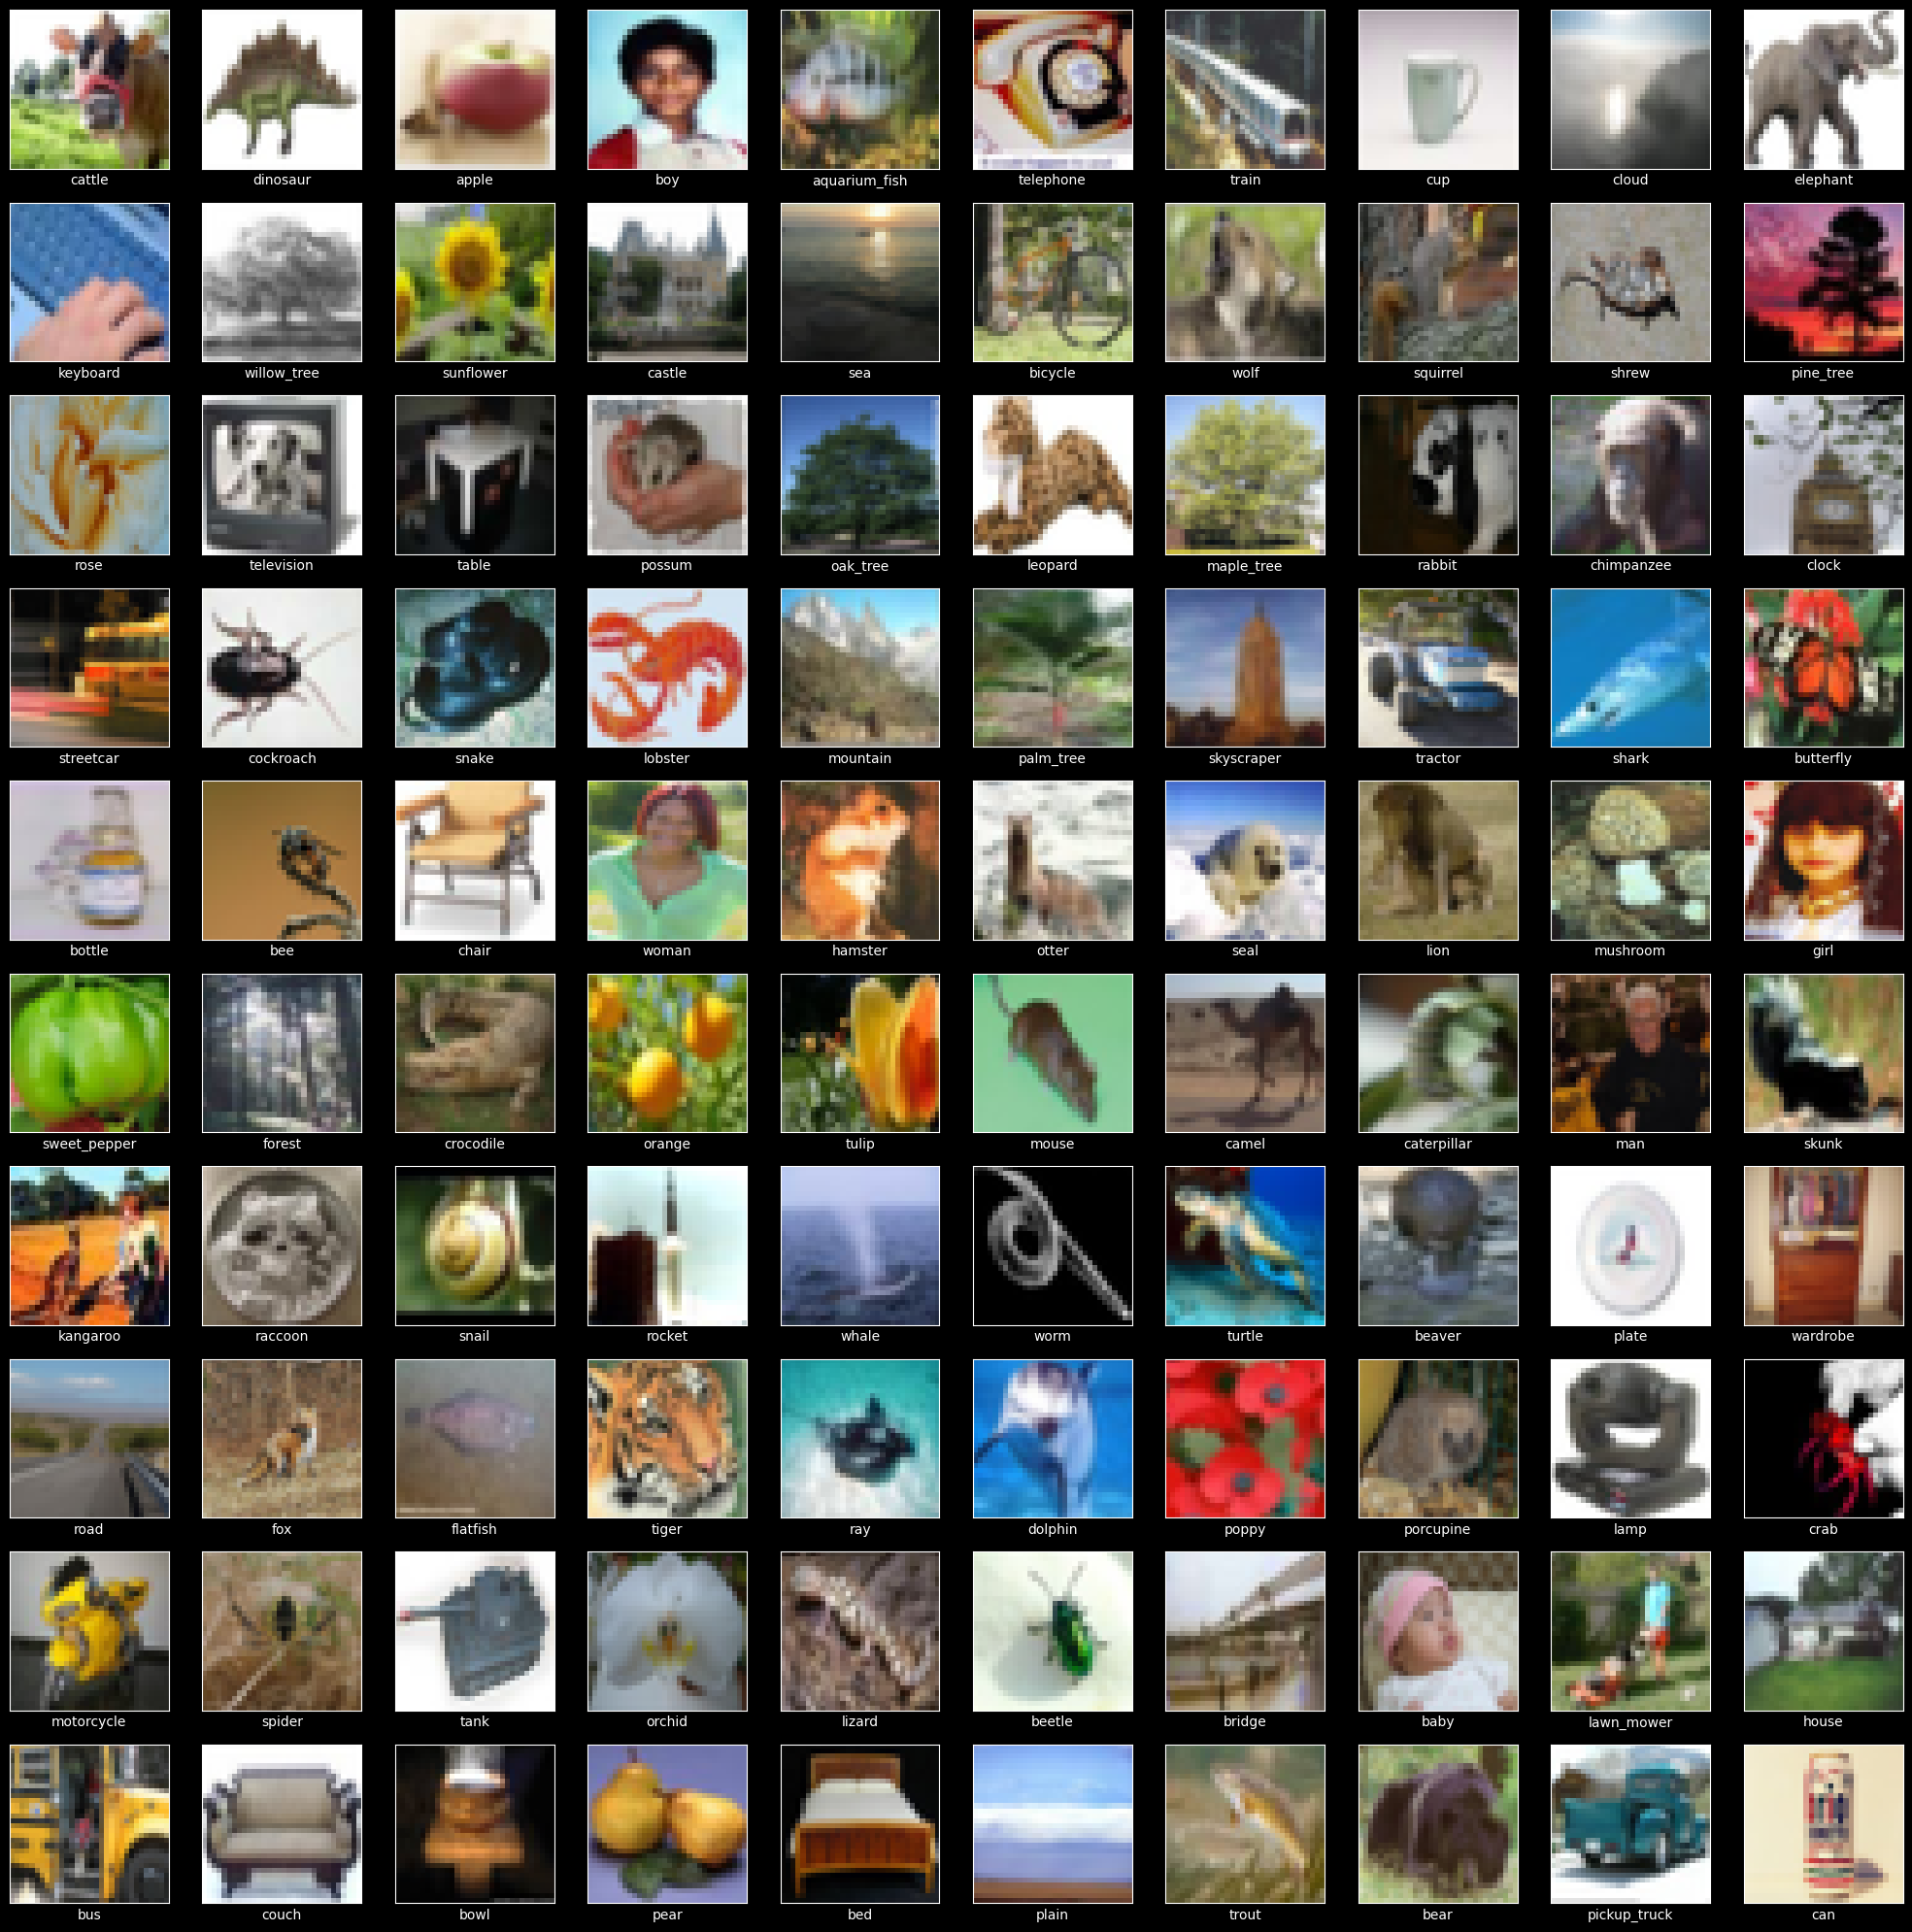

In [5]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total

plt.figure( figsize=(20,20) )
classes_displayed = set()
num_images = 0

for i in range(len(x_train)):
    label = y_train[i][0]
    if label not in classes_displayed:
        plt.subplot(10, 10, num_images+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_train[i])
        plt.xlabel(fine_labels[label])
        classes_displayed.add(label)
        num_images += 1

    if num_images >= 100:
        break

plt.tight_layout()
plt.show()



## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [6]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
y_train_categorical = keras.utils.to_categorical( y_train, num_classes=100 )
y_test_categorical = keras.utils.to_categorical( y_test, num_classes=100 )

model = keras.models.Sequential([
    
    Conv2D( 32, ( 3, 3 ), activation='relu', input_shape=( 32, 32, 3 ) ),
    MaxPooling2D( ( 2, 2 ) ), 
    Conv2D( 64, ( 3, 3 ), activation='relu' ),
    MaxPooling2D( ( 2, 2 ) ),
    Conv2D( 128, ( 3, 3 ), activation='relu' ),
    MaxPooling2D( ( 2, 2 ) ),
    Flatten(),
    Dense( 128, activation='relu' ),
    Dropout( 0.5 ),
    Dense( 100, activation='softmax' ),
    
])

model.compile( optimizer=Adam( learning_rate=0.001 ),
              loss='categorical_crossentropy',
              metrics=[ 'accuracy' ] )


/home/abhi/Documents/School/AI-Assignments/deep-learning-assignment/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-13 22:35:49.611089: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [7]:
# Print the DL model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [8]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
cnn_checkpoint_path = r"/content/drive/My Drive/Colab Notebooks/cifar/model_checkpoint.keras"
cnn_checkpoint_path = r'./model_checkpoint.keras'

cnn_checkpoint = ModelCheckpoint( filepath=cnn_checkpoint_path,
                              monitor='val_accuracy',
                              save_best_only=True,
                              save_weights_only=False,
                              verbose=1 )


In [9]:
# Train/fit the DL model using the training CIFAR-100 data

history = model.fit( x_train, y_train_categorical,
                     epochs=20,
                     batch_size=64,
                     validation_split=0.2,
                     callbacks=[ cnn_checkpoint ] )


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0264 - loss: 4.4566
Epoch 1: val_accuracy improved from -inf to 0.10680, saving model to ./model_checkpoint.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0264 - loss: 4.4563 - val_accuracy: 0.1068 - val_loss: 3.8827
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1006 - loss: 3.8522
Epoch 2: val_accuracy improved from 0.10680 to 0.18120, saving model to ./model_checkpoint.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1006 - loss: 3.8521 - val_accuracy: 0.1812 - val_loss: 3.4383
Epoch 3/20
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1506 - loss: 3.5492
Epoch 3: val_accuracy improved from 0.18120 to 0.21430, saving model to ./model_checkpoint.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1506 - loss: 3.5490 - val_accuracy: 0.2143 - val_loss: 3.2446
Epoch 4/20
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1883 - loss: 3.3590
Epoch 4: v

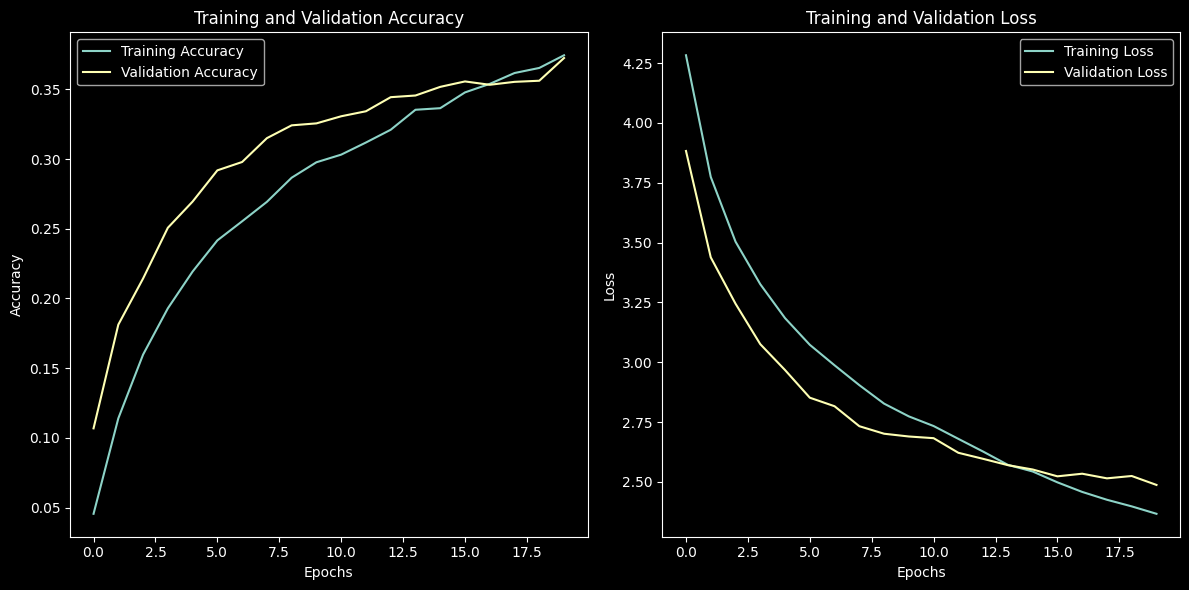

In [10]:
# Plot the training/validation accuracy and loss
history_dict = history.history

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy' )
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [11]:
# Re-initialize the model
model = keras.models.Sequential([
    
    Conv2D( 32, ( 3, 3 ), activation='relu', input_shape=( 32, 32, 3 ) ),
    MaxPooling2D( ( 2, 2 ) ), 
    Conv2D( 64, ( 3, 3 ), activation='relu' ),
    MaxPooling2D( ( 2, 2 ) ),
    Conv2D( 128, ( 3, 3 ), activation='relu' ),
    MaxPooling2D( ( 2, 2 ) ),
    Flatten(),
    Dense( 128, activation='relu' ),
    Dropout( 0.5 ),
    Dense( 100, activation='softmax' ),
    
])


In [12]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
model.load_weights( cnn_checkpoint_path )


In [13]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
model.compile( optimizer=Adam( learning_rate=0.001 ),
              loss='categorical_crossentropy',
              metrics=['accuracy'] )

test_loss, test_acc = model.evaluate( x_test, y_test_categorical )
print( f"Test accuracy: {test_acc:.4f} ~ {test_acc * 100:.2f}%" )


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3798 - loss: 2.4493
Test accuracy: 0.3755 ~ 37.55%


# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [14]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each w

vocab_size = 10000  # adjust the vocabulary size 
max_length = 100    # length for each newswire

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (8982, 100)
Training labels shape: (8982,)
Testing data shape: (2246, 100)
Testing labels shape: (2246,)


In [85]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

# Set maximum length for padding or truncating each newswire to be the same length
max_length = 200  

# Pad each newswire to ensure they are all of 'max_length'
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [99]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
max_words = 10000  # Only consider the top 10k words in the dataset
embedding_dim = 64
num_classes = 46   # Number of classes in the Reuters dataset

# Assuming y_train and y_test are already prepared as integer labels
y_train_categorical = to_categorical(y_train, num_classes=46)
y_test_categorical = to_categorical(y_test, num_classes=46)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim,),
    LSTM(units=128, return_sequences=True),
    LSTM(units=128),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 46 classes in the output layer (for classification)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [100]:
# Print the DL model summary
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [101]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
rnn_checkpoint_path = r"/content/drive/My Drive/Colab Notebooks/cifar/rnn_checkpoint.keras"
rnn_checkpoint_path = r'./rnn_checkpoint.keras'

rnn_checkpoint = ModelCheckpoint( filepath=rnn_checkpoint_path,
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  save_weights_only=False,
                                  verbose=1 )

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [102]:
# Train/fit the DL model using the training Reuters data

# Train the model
history = model.fit( x_train, y_train_categorical,
          epochs=20,
          batch_size=64,
          validation_split=0.2,
          callbacks=[ rnn_checkpoint ] )


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.3133 - loss: 2.8139
Epoch 1: val_accuracy improved from -inf to 0.34502, saving model to ./rnn_checkpoint.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.3134 - loss: 2.8121 - val_accuracy: 0.3450 - val_loss: 2.4129
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.3431 - loss: 2.4712
Epoch 2: val_accuracy did not improve from 0.34502
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 249ms/step - accuracy: 0.3431 - loss: 2.4713 - val_accuracy: 0.3450 - val_loss: 2.4094
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.3478 - loss: 2.4454
Epoch 3: val_accuracy did not improve from 0.34502
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - accuracy: 0.3477 - loss: 2.4454 - val_accuracy: 0.3450 - val_loss: 2.4108
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.3445 - loss: 2.4696
Epoch 4: val_accuracy did not improve from 0.34502
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 255ms/step

KeyboardInterrupt: 

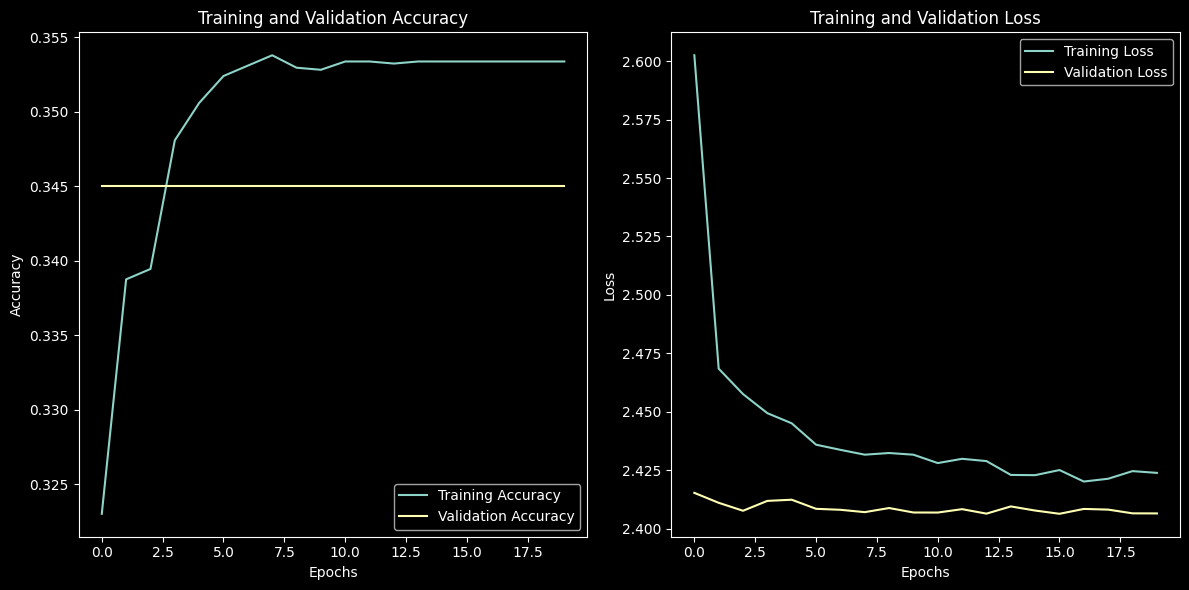

In [ ]:
# Plot the training/validation accuracy and loss
history_dict = history.history

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy' )
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [95]:
# Define the LSTM model
model = Sequential([
    
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32),
    Dropout(0.5),
    Dense(46, activation='softmax')  # 46 classes in the output layer (for classification)
    
])


In [96]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model.load_weights( rnn_checkpoint_path, skip_mismatch=True )


/home/abhi/Documents/School/AI-Assignments/deep-learning-assignment/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 3 objects could not be loaded. Example error message for object <Embedding name=embedding_19, built=False>:

Layer 'embedding_19' was never built and thus it doesn't have any variables. However the weights file lists 1 variables for this layer.
In most cases, this error indicates that either:

1. The layer is owned by a parent layer that implements a `build()` method, but calling the parent's `build()` method did NOT create the state of the child layer 'embedding_19'. A `build()` method must create ALL state for the layer, including the state of any children layers.

2. You need to implement the `def build_from_config(self, config)` method on layer 'embedding_19', to specify how to rebuild it during loading. In this case, you might also want to implement the method that generates the build config at saving time, `def get_buil

In [97]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [98]:
# Evaluate the trained DL model on the Reuters test dataset
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f} ~ {accuracy * 100:.2f}%")


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0024 - loss: 3.8244
Test Loss: 3.8245, Test Accuracy: 0.0022 ~ 0.22%


# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation 

